In [20]:
class ParticleColoring:
    def __init__(self, graph):
        self.graph = graph
        self.num_nodes = len(graph)
        self.colors = {node: None for node in graph}  # Početno, nijedan čvor nije obojen
        self.personal_best_colors = None
        self.personal_best_fitness = float('inf')  # Početna vrednost za najbolju ocenu
        
    def calculate_fitness(self):
        unique_colors = len(set(self.colors.values()))
        return unique_colors

    def update_position(self):
        for node in self.graph:
            neighbor_colors = {self.colors[neighbor] for neighbor in self.graph[node] if self.colors[neighbor] is not None}
            if self.colors[node] is not None:
                neighbor_colors.add(self.colors[node])  # Dodajemo boju čvora ako je obojen
            new_color = 0
            while new_color in neighbor_colors:
                new_color += 1
            self.colors[node] = new_color

    @classmethod
    def update_global_best(cls, personal_best_fitness, personal_best_colors):
        if personal_best_fitness < cls.swarm_best_fitness:
            cls.swarm_best_fitness = personal_best_fitness
            cls.swarm_best_colors = personal_best_colors.copy()

def pso_coloring(graph, swarm_size, num_iters):
    ParticleColoring.swarm_best_colors = None
    ParticleColoring.swarm_best_fitness = float('inf')
    
    swarm = [ParticleColoring(graph) for _ in range(swarm_size)]
    
    for i in range(num_iters):
        for particle in swarm:
            particle.update_position()
            fitness = particle.calculate_fitness()
            if fitness < particle.personal_best_fitness:
                particle.personal_best_fitness = fitness
                particle.personal_best_colors = particle.colors.copy()
                ParticleColoring.update_global_best(fitness, particle.personal_best_colors)
    
    print("Best colors:", ParticleColoring.swarm_best_colors)
    print("Best fitness:", ParticleColoring.swarm_best_fitness)
    return ParticleColoring.swarm_best_colors, ParticleColoring.swarm_best_fitness


Best colors: {1: 0, 13: 1, 25: 2, 37: 3, 49: 4, 61: 5, 73: 6, 85: 7, 97: 8, 109: 9, 121: 10, 2: 2, 3: 3, 4: 1, 5: 5, 6: 4, 7: 7, 8: 6, 9: 9, 10: 8, 11: 11, 12: 3, 23: 4, 34: 2, 45: 1, 56: 6, 67: 5, 78: 8, 89: 7, 100: 10, 111: 9, 14: 0, 26: 5, 38: 1, 50: 3, 62: 4, 74: 8, 86: 6, 98: 10, 110: 7, 24: 6, 35: 0, 46: 7, 57: 8, 68: 3, 79: 10, 90: 4, 101: 12, 112: 5, 15: 4, 27: 0, 39: 6, 51: 2, 63: 1, 75: 10, 87: 5, 99: 12, 36: 8, 47: 6, 58: 9, 69: 11, 80: 1, 91: 13, 102: 14, 113: 4, 16: 2, 28: 7, 40: 5, 52: 0, 64: 3, 76: 4, 88: 9, 48: 10, 59: 2, 70: 0, 81: 14, 92: 9, 103: 8, 114: 6, 17: 9, 29: 1, 41: 4, 53: 11, 65: 0, 77: 2, 60: 7, 71: 15, 82: 3, 93: 16, 104: 11, 115: 12, 18: 11, 30: 9, 42: 7, 54: 12, 66: 13, 72: 1, 83: 12, 94: 14, 105: 2, 116: 0, 19: 5, 31: 16, 43: 13, 55: 8, 84: 0, 95: 3, 106: 15, 117: 13, 20: 12, 32: 11, 44: 15, 96: 2, 107: 16, 118: 11, 21: 6, 33: 3, 108: 4, 119: 1, 22: 16, 120: 14}
Best fitness: 17


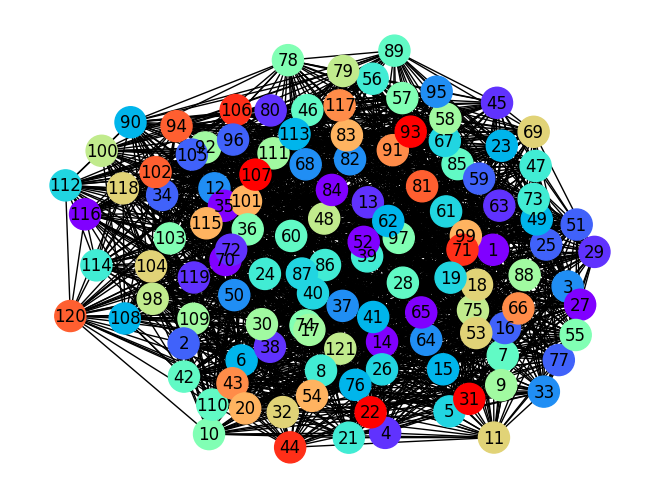

In [37]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph(graph, colors):
    G = nx.Graph(graph)
    node_colors = [colors[node] for node in G.nodes()]
    nx.draw(G, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
    plt.show()

graph = nx.Graph()
with open('fajl.txt', 'r') as file:
    for line in file:
        parts = line.split()
        if parts[0] == 'e':
            graph.add_edge(int(parts[1]), int(parts[2]))
        
best_colors, best_fitness = pso_coloring(graph, swarm_size=40, num_iters=4000)

# Iscrtavanje grafa sa najboljim bojenjem
plot_graph(graph, best_colors)
